#Task 1: Low Pass Filters
You are required to implement three functions corresponding to three types of low pass filters. These are:
<ol>
<li> Ideal low pass filter </li>

<li> Butterworth filter </li>

<li> Gaussian filter </li>
</ol>
For each of these filters, we will be considering a parameter, $D_0$, which denotes the cutoff frequency. And in case of the Butterworth filter, we will consider an additional parameter, $n$, which denotes the order.

Complete the three functions given in the following code cells:

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

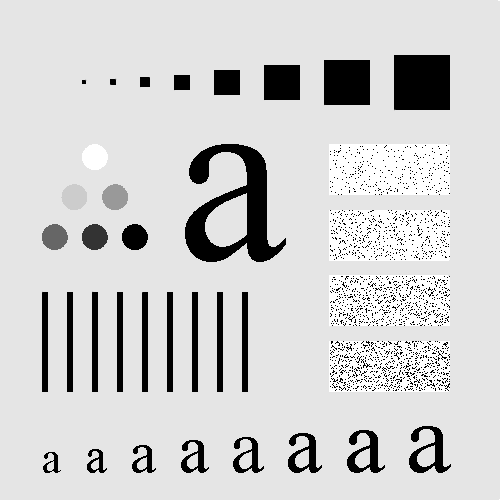

In [ ]:
# Generate outputs for Task 1 here
image = cv2.imread('/content/Fig0333(a)(test_pattern_blurring_orig).tif', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

In [ ]:
def idealLPF(image, D0):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = (D <= D0).astype(np.float32)

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)

  return blur_image, H

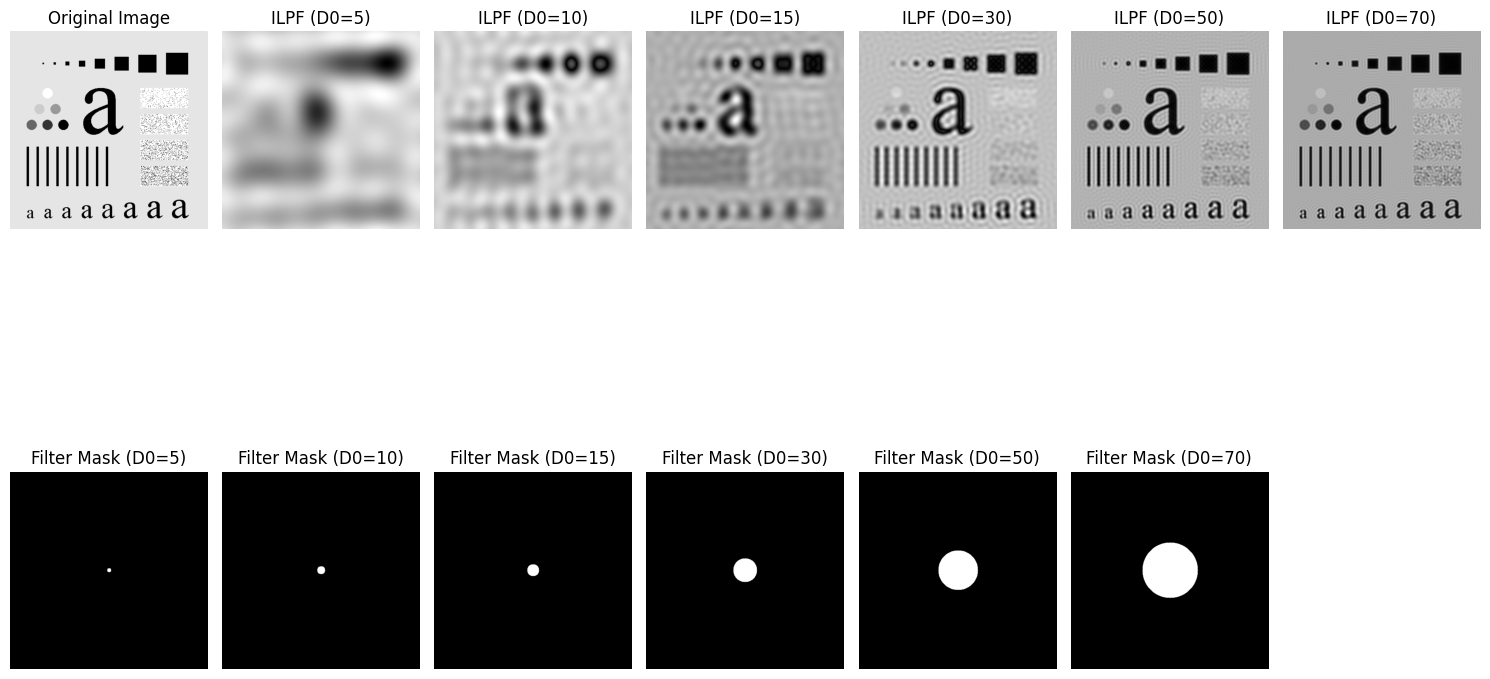

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image, H = idealLPF(image, D0)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  # Filtered image
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"ILPF (D0={D0})")
  plt.axis('off')

  plt.subplot(2, len(D0_values) + 1, i + len(D0_values) + 2)
  plt.imshow(np.log(1 + np.abs(H)), cmap='gray')
  plt.title(f"Filter Mask (D0={D0})")
  plt.axis('off')



plt.tight_layout()
plt.show()

In [ ]:
def butterworthLPF(image, D0, n):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = 1 / (1 + (D / D0)**(2 * n))

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)

  return blur_image

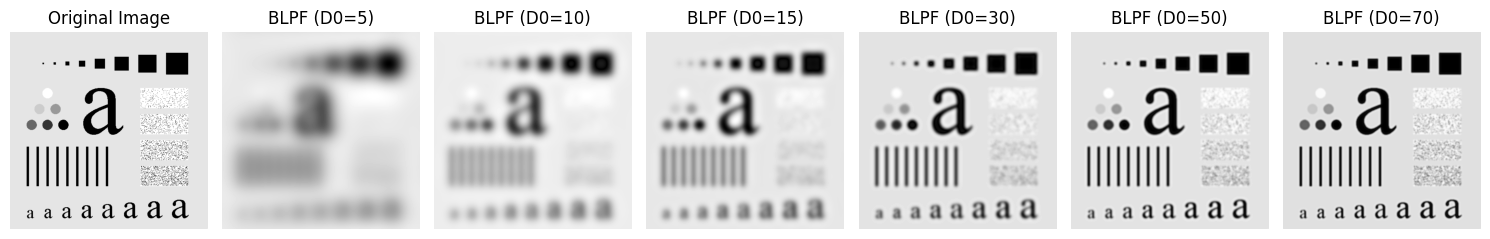

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image = butterworthLPF(image, D0,2)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  # Filtered image
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"BLPF (D0={D0})")
  plt.axis('off')



plt.tight_layout()
plt.show()

In [ ]:
def gaussianLPF(image, D0):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = np.exp(-(D**2) / (2 * (D0**2)))

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)


  return blur_image

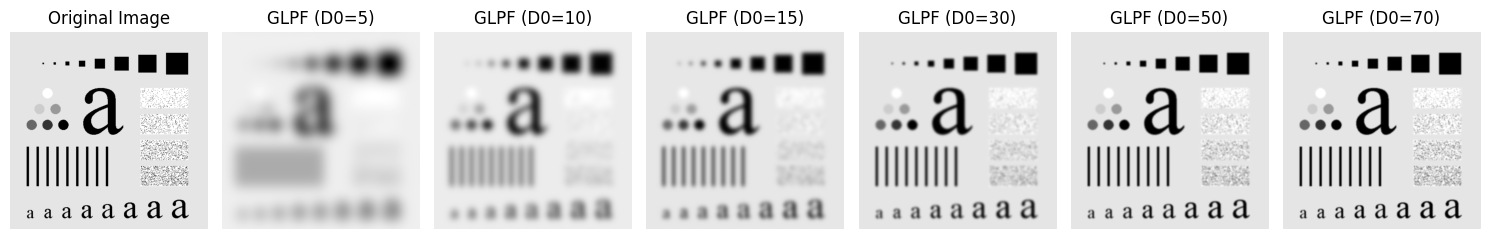

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image = gaussianLPF(image, D0)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  # Filtered image
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"GLPF (D0={D0})")
  plt.axis('off')



plt.tight_layout()
plt.show()

# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 04.zip. Use your previously implemented functions to show the outputs of the three low pass filters on the sample image. Provide your analysis on the following observations:
<ol>
<li> Explain the reasons for the ringing effect in case of ideal low pass filter. </li>

<li> How can the Butterworth filter be made to have similar effect as the Ideal low pass filter? </li>

<li> How can the Butterworth filter be made to have similar effect as the Gaussian filter? </li>
</ol>

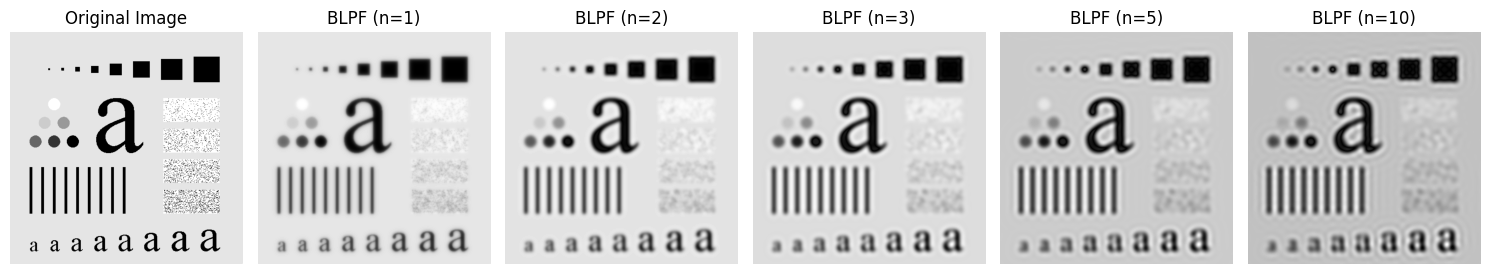

In [ ]:
D0 = 30
n_values = [1, 2, 3, 5, 10]
results = []

for n in n_values:
    filtered_image = butterworthLPF(image, D0, n)
    results.append((n, filtered_image))

# Plotting the results
plt.figure(figsize=(15, 10))

# Plot original image
plt.subplot(2, len(n_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot filtered images for different n values
for i, (n, filtered_image) in enumerate(results):
    plt.subplot(2, len(n_values) + 1, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"BLPF (n={n})")
    plt.axis('off')

plt.tight_layout()
plt.show()

**1. Ringing Effect in Ideal Low Pass Filter:**
The ringing effect in an Ideal Low Pass Filter is a result of the sharp cutoff at the frequency D0. When the Ideal LPF is applied, the filter abruptly drops the high frequencies above D0, leading to a discontinuous transition in the frequency domain. This abrupt transition causes high-frequency oscillations in the spatial domain after the inverse FFT, manifesting as a ringing effect. So to represent this sharp cutoff in the spatial domain a combination of sine and cos waves of various frequencies and amplitudes are used which results in Ringing Effect in the spatial domain. Another intuition behind it can be is that, due to sharp cuttoff the high frequencies near the cutoff osscilates in spatial domain. So when convolved in spatial domain with the filter it produces ringing effect.

**2. Making Butterworth Filter Similar to Ideal Low Pass Filter:**
The Butterworth filter already has a smoother roll-off compared to the Ideal LPF. To make the Butterworth filter behave more like an Ideal Low Pass Filter, we can:-
* Increase the filter order n: The larger the order n, the steeper the roll-off of the Butterworth filter, making it approach the sharp cutoff of the Ideal LPF.

**3. Making Butterworth Filter Similar to Gaussian Filter:**
The Gaussian filter has a smooth exponential decay, whereas the Butterworth filter has a polynomial decay. To make the Butterworth filter behave more like a Gaussian filter:-
* Choose a low filter order n: A low value for n will produce a smoother decay for the Butterworth filter, similar to the Gaussian decay.
* Adjust the cutoff frequency D0: To achieve a similar effect as the Gaussian filter, you may need to fine-tune the cutoff frequency D0 so that the roll-off matches the Gaussian decay in terms of how fast the filter attenuates high frequencies.

# Task 2
For this task, you are required to write three functions  that will each convert the low pass filters implemented in Task 1 into their corresponding high pass versions.

In [ ]:
def idealHPF(image, D0):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = (D > D0).astype(np.float32)

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)

  return blur_image

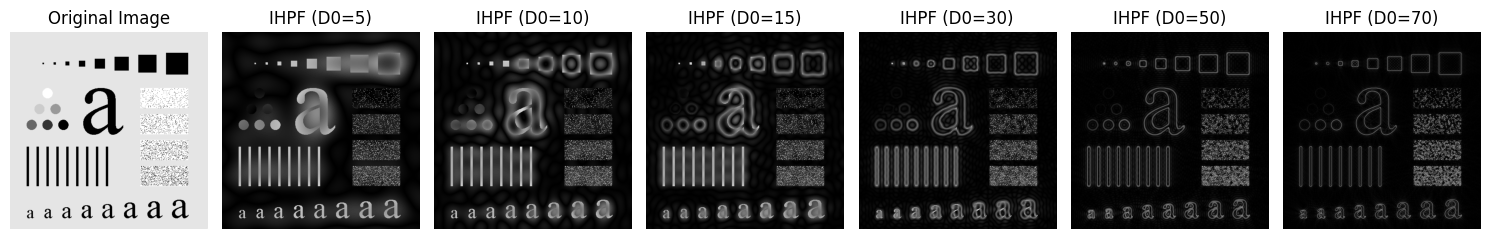

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image = idealHPF(image, D0)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"IHPF (D0={D0})")
  plt.axis('off')



plt.tight_layout()
plt.show()

In [ ]:
def butterworthHPF(image, D0, n):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = 1 / (1 + (D0 / D)**(2 * n))
  H[D == 0] = 0

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)

  return blur_image

<ipython-input-54-c211bc767a63>:8: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2 * n))


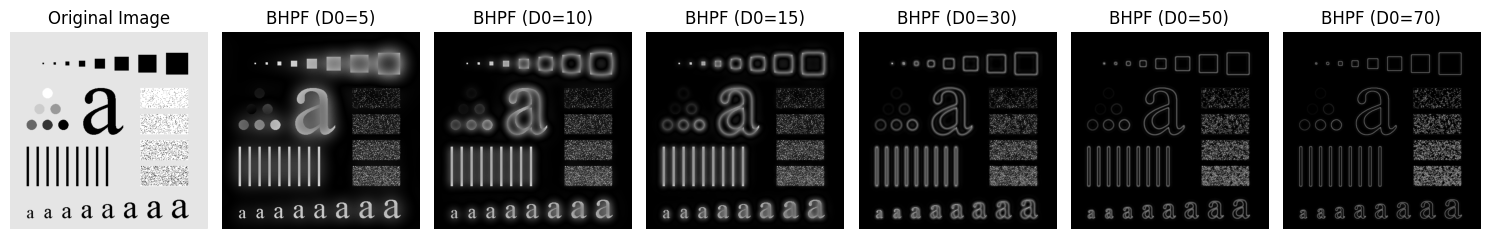

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image = butterworthHPF(image, D0,2)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"BHPF (D0={D0})")
  plt.axis('off')



plt.tight_layout()
plt.show()

In [ ]:
def gaussianHPF(image, D0):
  rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2

  u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
  D = np.sqrt(u**2 + v**2)

  H = 1 - np.exp(-(D**2) / (2 * (D0**2)))

  fshift = np.fft.fftshift(np.fft.fft2(image))
  fshift_filtered = fshift * H
  img_filtered = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
  blur_image = np.abs(img_filtered)

  return blur_image

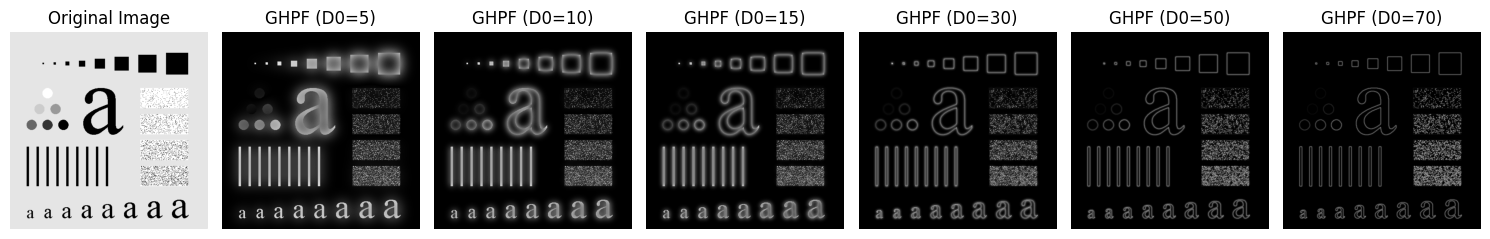

In [ ]:
D0_values = [5, 10, 15, 30, 50, 70]
results = []
for D0 in D0_values:
  filtered_image = gaussianHPF(image, D0)
  results.append((D0, filtered_image, H))

plt.figure(figsize=(15, 10))
plt.subplot(2, len(D0_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, (D0, filtered_image, H) in enumerate(results):
  plt.subplot(2, len(D0_values) + 1, i + 2)
  plt.imshow(filtered_image, cmap='gray')
  plt.title(f"GHPF (D0={D0})")
  plt.axis('off')


plt.tight_layout()
plt.show()

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the three high pass filtering techniques on an appropriate image.

Provide your analysis on the following topic:
<ol>
<li> Do we see the similar effect in ideal HPF as we did in case of ideal LPF? If so, then why? </li>

<li> How does filter cutoff frequency affect the extraction of edges in case of HPF? </li>
</ol>

**1. Do We See the Similar Effect in Ideal HPF as We Did in Ideal LPF?**\
Yes, the Ideal High Pass Filter (HPF) exhibits a similar effect to the Ideal Low Pass Filter (LPF), but in the opposite direction:

Ideal LPF removes high frequencies, resulting in a blurred image with smooth transitions.
Ideal HPF removes low frequencies, resulting in an image where the edges and high-frequency details are more pronounced.
The reason for the similarity is that the Ideal HPF is the complement of the Ideal LPF. When we subtract the low-frequency components from the image, we are left with the high-frequency details such as edges, sharp transitions, and noise.

This emphasizes fine details and sharp boundaries in the image, much like the high-pass filter behavior in general. However, ringing effects (due to the sharp cutoff in the frequency domain) will still occur, similar to the ringing effects in Ideal LPF, but they will be more pronounced around high-frequency components.

**2. How Does Filter Cutoff Frequency Affect the Extraction of Edges in HPF?**\
The cutoff frequency D0 has a significant effect on the extraction of edges in high-pass filtering:

* **Smaller D0:** A smaller cutoff frequency means that the filter allows only higher frequencies to pass, which highlights fine details such as sharp edges, noise, and small textures. This can result in an image where edges are very sharp.

* **Larger D0:** A larger cutoff frequency allows more of the low-frequency components to pass through, which can result in less pronounced edges and fewer high-frequency details being extracted. The edges become smoother, and finer details are less emphasized.

* **Effect on Edge Detection:** When we decrease the cutoff frequency, the edge sharpness increases as high frequencies (which carry edge information) are retained. For edge detection, it is important to choose a cutoff frequency that isolates the appropriate high-frequency components. If the cutoff is too high (allowing too much low frequency), the edges might become blurred. If the cutoff is too low, we might preserve too much noise or lose important details.